# 04. Transfer Learning in TensorFlow Part 1: Feature Extraction Exercises
1. Build and fit a model using the same data we have here but with the MobileNetV2 architecture feature extraction [mobilenet_v2_100_224/feature_vector](https://tfhub.dev/google/imagenet/mobilenet_v2_100_224/feature_vector/4) from TensorFlow Hub, how does it perform compared to our other models?
2. Name 3 different image classification models on TensorFlow Hub that we haven't used.
3. Build a model to classify images of two different things you've taken photos of.
* You can use any feature extraction layer from TensorFlow Hub you like for this.
* You should aim to have at least 10 images of each class, for example to build a fridge versus oven classifier, you'll want 10 images of fridges and 10 images of ovens.
4. What is the current best performing model on ImageNet?
* Hint: you might want to check https://sotabench.com for this.

# Getting the data and setting things up

In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Get data (10% of dataset)
!dir

 Volume in drive C is Windows-SSD
 Volume Serial Number is 9C4D-A4B5

 Directory of C:\Users\LENOVO\Desktop\tensorflow-deep-learning-101\04-transfer-learning-in-tensorflow-part-1-feature-extraction

07/01/2022  08:40 PM    <DIR>          .
06/20/2022  01:13 PM    <DIR>          ..
07/01/2022  08:37 PM    <DIR>          .ipynb_checkpoints
06/03/2022  04:12 PM            93,045 04-transfer-learning-in-tensorflow-part-1-feature-extraction.ipynb
06/30/2022  01:26 AM            97,946 04-transfer-learning-in-tensorflow-part-1-feature-extraction_2.ipynb
07/01/2022  08:40 PM             1,903 04-Transfer-learning-in-tensorflow-part1-feature-extraction-exercise.ipynb
06/03/2022  01:54 PM    <DIR>          10_food_classes_10_percent
06/03/2022  01:54 PM       168,546,183 10_food_classes_10_percent.zip
06/03/2022  03:22 PM    <DIR>          tensorflow_hub
06/03/2022  01:54 PM    <DIR>          __MACOSX
               4 File(s)    168,739,077 bytes
               6 Dir(s)  13,961,789,440 bytes fr

In [3]:
# How many image in each folder ?
import os

# walk through 10 percent data directory and list number of files
for dirpath, dirnames, filenames in os.walk("10_food_classes_10_percent"):
    print(f"There are {len(dirnames)} directories and {len(filenames)} images in '{dirpath}'.")

There are 2 directories and 0 images in '10_food_classes_10_percent'.
There are 10 directories and 0 images in '10_food_classes_10_percent\test'.
There are 0 directories and 250 images in '10_food_classes_10_percent\test\chicken_curry'.
There are 0 directories and 250 images in '10_food_classes_10_percent\test\chicken_wings'.
There are 0 directories and 250 images in '10_food_classes_10_percent\test\fried_rice'.
There are 0 directories and 250 images in '10_food_classes_10_percent\test\grilled_salmon'.
There are 0 directories and 250 images in '10_food_classes_10_percent\test\hamburger'.
There are 0 directories and 250 images in '10_food_classes_10_percent\test\ice_cream'.
There are 0 directories and 250 images in '10_food_classes_10_percent\test\pizza'.
There are 0 directories and 250 images in '10_food_classes_10_percent\test\ramen'.
There are 0 directories and 250 images in '10_food_classes_10_percent\test\steak'.
There are 0 directories and 250 images in '10_food_classes_10_percent

# Creating data loader (preparing the data)

We'll use the `ImageDataGenerator` class to load in our images in batches.

In [4]:
# setup data input
from tensorflow.keras.preprocessing.image import ImageDataGenerator

IMG_SIZE = (224, 224)
BATCH_SIZE = 32

train_dir = "10_food_classes_10_percent/train"
test_dir = "10_food_classes_10_percent/test"

train_datagen = ImageDataGenerator(rescale=1/255.)
test_datagen = ImageDataGenerator(rescale=1/255.)

print("Training Image: ")
train_data_10_percent = train_datagen.flow_from_directory(train_dir,
                                                         target_size=IMG_SIZE,
                                                         batch_size=BATCH_SIZE,
                                                         class_mode="categorical")

print("Testing Image: ")
test_data = test_datagen.flow_from_directory(test_dir,
                                            target_size=IMG_SIZE,
                                            batch_size=BATCH_SIZE,
                                            class_mode="categorical")

Training Image: 
Found 750 images belonging to 10 classes.
Testing Image: 
Found 2500 images belonging to 10 classes.


> 1. Build and fit a model using the same data we have here but with the MobileNetV2 architecture feature extraction [mobilenet_v2_100_224/feature_vector](https://tfhub.dev/google/imagenet/mobilenet_v2_100_224/feature_vector/4) from TensorFlow Hub, how does it perform compared to our other models?

In [5]:
# Import tensorflow hub
import tensorflow_hub as hub
from tensorflow.keras import layers

# MobileNetV2 feature vector URL
mobilenet_v2_url = "https://tfhub.dev/google/imagenet/mobilenet_v2_100_224/feature_vector/5"

# Download the pretrained model and saving it as a keras layer
mobilenet_feature_extraction_layer = hub.KerasLayer(mobilenet_v2_url,
                                                   trainable=False,
                                                   input_shape= IMG_SIZE + (3,))

In [6]:
train_data_10_percent.num_classes

10

In [7]:
# Build the model using a Sequential model with our mobilenet feature extraction layer
model = tf.keras.Sequential([
    mobilenet_feature_extraction_layer,
    layers.Dense(train_data_10_percent.num_classes, activation="softmax", name="output_layer")
])

# Print out the summary of our model
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
keras_layer (KerasLayer)     (None, 1280)              2257984   
_________________________________________________________________
output_layer (Dense)         (None, 10)                12810     
Total params: 2,270,794
Trainable params: 12,810
Non-trainable params: 2,257,984
_________________________________________________________________


In [8]:
# Compile the model
model.compile(loss="categorical_crossentropy",
             optimizer=tf.keras.optimizers.Adam(),
             metrics=["accuracy"])

In [10]:
# Fit the our model
initial_epochs = 5

history_mobilenetv2  = model.fit(train_data_10_percent,
                                epochs=initial_epochs,
                                steps_per_epoch=len(train_data_10_percent),
                                validation_data=test_data,
                                validation_steps=len(test_data))

Epoch 1/5
24/24 [==============================] - 22s 478ms/step - loss: 2.1503 - accuracy: 0.2693 - val_loss: 1.3570 - val_accuracy: 0.6088
Epoch 2/5
24/24 [==============================] - 8s 336ms/step - loss: 1.0896 - accuracy: 0.6853 - val_loss: 0.8904 - val_accuracy: 0.7396
Epoch 3/5
24/24 [==============================] - 8s 330ms/step - loss: 0.7606 - accuracy: 0.8000 - val_loss: 0.7472 - val_accuracy: 0.7812
Epoch 4/5
24/24 [==============================] - 7s 320ms/step - loss: 0.5992 - accuracy: 0.8493 - val_loss: 0.6729 - val_accuracy: 0.7952
Epoch 5/5
24/24 [==============================] - 8s 325ms/step - loss: 0.4990 - accuracy: 0.8813 - val_loss: 0.6393 - val_accuracy: 0.8008


In [11]:
# Let's create the function to plot loss Curves
import matplotlib.pyplot as plt

# Plot the validation and training curves
def plot_loss_curves(history):
    """
    Returns separate loss curves for training and validation metrics.
    
    Args:
        history: TensorFlow History object.
        
    Returns:
        Plots of training/Validation loss and accuracy metrics.
    """
    loss = history.history["loss"]
    val_loss = history.history['val_loss']
    
    accuracy = history.history["accuracy"]
    val_accuracy = history.history["val_accuracy"]
    
    epochs = range(len(history.history["loss"]))
    
    # Plot Loss
    plt.plot(epochs, loss, label="training_loss")
    plt.plot(epochs, val_loss, label="val_loss")
    plt.title("Loss")
    plt.xlabel("Epochs")
    plt.legend()
    
    # Plot accuracy
    plt.figure() # separate plot
    plt.plot(epochs, accuracy, label="Training_accuracy")
    plt.plot(epochs, val_accuracy, label='val_accuracy')
    plt.title("Accuracy")
    plt.xlabel("Epochs")
    plt.legend();

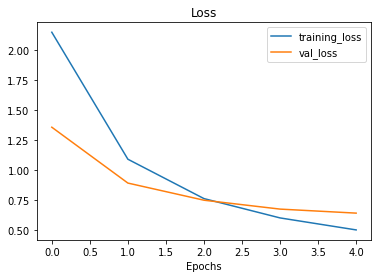

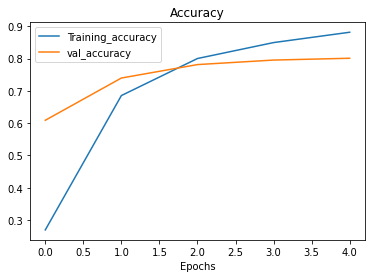

In [12]:
# Let's plot loss curves of our model
plot_loss_curves(history_mobilenetv2)

This our model's (mobilenetv2) Look like position between resnetv250 & EfficientNetB0

> 2. Name 3 different image classification models on TensorFlow Hub that we haven't used.

* Inception ResNet
* Inception family of models
* NASNet models
* Some of the ResNet versions of models

link - https://tfhub.dev/s?module-type=image-classification&tf-version=tf2

> 3. Build a model to classify images of two different things you've taken photos of.
> * You can use any feature extraction layer from TensorFlow Hub you like for this.
> * You should aim to have at least 10 images of each class, for example to build a fridge versus oven classifier, you'll 

In [15]:
# Getting the data dir path
data_dir = "CNN_dataset"

for dirpath, dirnames, filenames in os.walk(data_dir):
    print(f"There are {len(dirnames)} directories and {len(filenames)} images in '{dirpath}'.")

There are 2 directories and 0 images in 'CNN_dataset'.
There are 0 directories and 10 images in 'CNN_dataset\hot_dog'.
There are 0 directories and 10 images in 'CNN_dataset\not_hot_dog'.


In [16]:
# Using the image dataset from directory to read in the data
train_data = tf.keras.preprocessing.image_dataset_from_directory(data_dir,
                                                                 labels="inferred",
                                                                 image_size=IMG_SIZE,
                                                                 batch_size=8)

Found 20 files belonging to 2 classes.


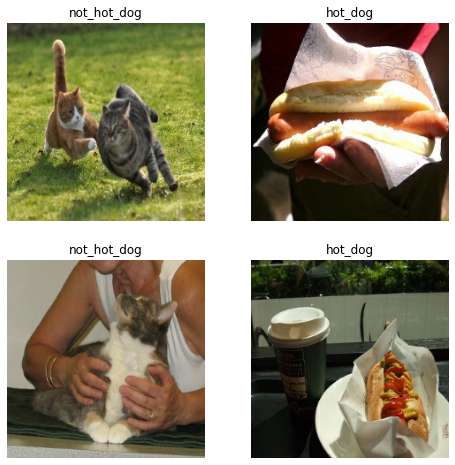

In [17]:
# Let's visualize how our data look like!
plt.figure(figsize=(8, 8))
class_names = train_data.class_names
for images, labels in train_data.take(1):
    for i in range(4):
        ax = plt.subplot(2, 2, i+1)
        plt.imshow(images[i].numpy().astype('uint8'))
        plt.title(class_names[labels[i]])
        plt.axis(False)

Let's use the above mobilenet feature extractor model to train on our custom data.

In [18]:
# Build a Sequential model with our mobilenet feature extraction layer for our custom data
custom_data_model = tf.keras.Sequential([
    mobilenet_feature_extraction_layer,
    layers.Dense(1, activation="sigmoid", name="output_layer")
])

# Print out the summary of the model
custom_data_model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
keras_layer (KerasLayer)     (None, 1280)              2257984   
_________________________________________________________________
output_layer (Dense)         (None, 1)                 1281      
Total params: 2,259,265
Trainable params: 1,281
Non-trainable params: 2,257,984
_________________________________________________________________


In [19]:
# Compile the model
custom_data_model.compile(loss="binary_crossentropy",
                         optimizer=tf.keras.optimizers.Adam(),
                         metrics=["accuracy"])

In [20]:
# Fit the model
custom_model_history = custom_data_model.fit(train_data,
                                            epochs=15)

Epoch 1/15
3/3 [==============================] - 2s 15ms/step - loss: 0.7232 - accuracy: 0.5000
Epoch 2/15
3/3 [==============================] - 0s 15ms/step - loss: 0.6639 - accuracy: 0.5000
Epoch 3/15
3/3 [==============================] - 0s 15ms/step - loss: 0.6152 - accuracy: 0.6500
Epoch 4/15
3/3 [==============================] - 0s 14ms/step - loss: 0.5931 - accuracy: 0.7000
Epoch 5/15
3/3 [==============================] - 0s 15ms/step - loss: 0.5616 - accuracy: 0.8500
Epoch 6/15
3/3 [==============================] - 0s 18ms/step - loss: 0.5375 - accuracy: 0.8500
Epoch 7/15
3/3 [==============================] - 0s 15ms/step - loss: 0.5127 - accuracy: 0.8500
Epoch 8/15
3/3 [==============================] - 0s 16ms/step - loss: 0.4855 - accuracy: 0.8500
Epoch 9/15
3/3 [==============================] - 0s 15ms/step - loss: 0.4644 - accuracy: 0.9000
Epoch 10/15
3/3 [==============================] - 0s 14ms/step - loss: 0.4422 - accuracy: 0.9500
Epoch 11/15
3/3 [============

looking at the model accuracy metric we can't say much, although we got a decent accuracy let's test of our model on some random images.